# The Probability Mass Function (PMF)

## Introduction
In this lesson, you'll look at a way to represent discrete distributions - the probability mass function (PMF), which maps from each value to its probability. You'll explore probability density functions (PDFs) for continuous data later!


## Objectives

You will be able to: 
* Describe how probability is represented in the probability mass function
* Visualize the PMF and describe its relationship with histograms

## What is a Probability Mass Function (PMF)?

A probability mass function (PMF), sometimes referred to as a frequency function, is a function that associates probabilities with discrete random variables. You already learned about this in the context of coin flips and dice rolls. The **discrete** part in discrete distributions means that there is a **known number of possible outcomes**. 

**Based on your experience of rolling a dice**, you can develop a PMF showing the probabilities of each possible value between 1 and 6 occurring.


More formally:

> The Probability Mass Function (PMF) maps a probability ($P$) of observing an outcome $x$ of our discrete random variable $X$ in a way that this function takes the form $f(x) = P(X = x)$.

$X$ being a discrete random variable, we can say that the range $R_X$ is a countable set of all possible values of X. 
They can be represented as a set as follows:

$R_x = \{ x_1,x_2,x_3,\ldots \}$

where $x_1,x_2,x_3,\ldots$ are the possible values of $x$. 


Say we are interested in quantifying the probability that $X$ is equal to some given quantity $x_3$. That is, we want to know $P(x_3)$. For example, in the case of our dice, we might be interested in the probability of getting a 3,  which, in this case, would be $P(3) = \dfrac{1}{6}$

Think of the event $A$, such that  $A = \{ X = x_k \}$ is defined as the set of outcomes $s$ in the sample space $S$ for which the corresponding value of $X$ is equal to $x_k$.  This can be written as:

$$\large A = \{ s \in S \mid X(s) = x_k \}$$

(Remember that $s \in S$ is mathematical notation for "$s$ belongs to $S$" or "$s$ is in $S$"). 

## PMF Intuition

Let's work through a brief example calculating the probability mass function for a discrete random variable!

You have previously seen that a **probability** is a number in the range [0,1] that is calculated as the *frequency expressed as a fraction of the sample size.* This means that, in order to convert any random variable's frequency into a probability, we need to perform the following steps:

* Get the frequency of every possible value in the dataset
* Divide the frequency of each value by the total number of values (length of dataset)
* Get the probability for each value

Let's show this using a simple toy example:

In [1]:
# Count the frequency of values in a given dataset
import collections
x = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter = collections.Counter(x)
print(counter)

print(len(x))

Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
13


You'll notice that this returned a dictionary, with keys being the possible outcomes, and values of these keys set to the frequency of items. You can calculate the PMF using step 2 above. 

_Note: You can read more about the `collections` library [here](https://docs.python.org/3.6/library/collections.html)._

In [2]:
# Convert frequency to probability - divide each frequency value by total number of values
pmf = []
for key,val in counter.items():
    pmf.append(round(val/len(x), 2))
    
print(counter.keys(), pmf)

dict_keys([1, 2, 3, 4, 5]) [0.31, 0.31, 0.15, 0.08, 0.15]


You notice that the PMF is normalized so the total probability is 1.

In [3]:
import numpy as np

np.array(pmf).sum()

1.0

## Visualizing a PMF

You can inspect the probability mass function of a discrete variable by visualizing the distribution using `matplotlib`. You can use a simple bar graph to show the probability mass function using the probabilities calculated above. 

Here's the code:

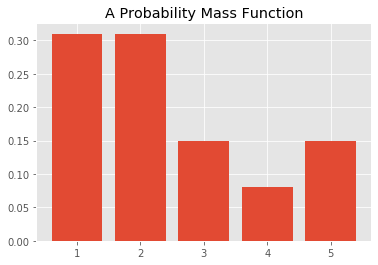

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.bar(counter.keys(), pmf);
plt.title("A Probability Mass Function");

This looks pretty familiar. It's essentially a normalized histogram! You can use `plt.hist(x)` to obtain the histogram.

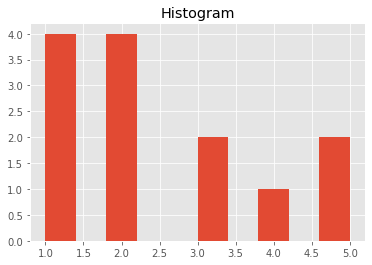

In [5]:
plt.hist(x);
plt.title('Histogram');

If you look carefully, there is only a difference in the y-axis: the histogram shows the frequency count of each value in a dataset, whereas the bar plot here shows probabilities. 

You can alter your histogram to show probabilities instead of frequency counts using the `density = True` argument. 

While we're at it, let's rescale our x-axis a little bit better in our histogram. You can also change the width of your vertical bars using the argument `rwidth`.

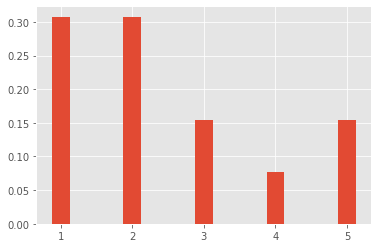

In [6]:
xtick_locations = np.arange(1.5, 7.5, 1)  # x=5, 15, 25, ...
xtick_labels = ['1', '2', '3', '4', '5']
bins = range(1, 7, 1) 
plt.xticks(xtick_locations, xtick_labels)

plt.hist(x, bins=bins,  rwidth=0.25, density=True);

## Expected Value and Variance

When talking about distributions, there will generally be two descriptive quantities you're interested in: the **expected value** and the **Variance**. For discrete distributions, the expected value of your discrete random value X is given by:

$$\large E(X) = \mu = \sum_i p(x_i)x_i$$

The variance is given by:

$$\large E((X-\mu)^2) = \sigma^2 = \sum_i p(x_i)(x_i-\mu)^2$$


The table below pust these formulas into practice using our example to get a better understanding!

| outcome      | 1     | 2     | 3     | 4    | 5     |$\sum$  |
|--------------|-------|-------|-------|------|-------|--------|
|<img width=100/>|<img width=130/>|<img width=130/>|<img width=130/>|<img width=130/>|<img width=130/>|<img width=100/>|
| probability  | $0.31$  |$ 0.31$  | $0.15$  | $0.08$ | $0.15$  |  $ 1$    |
| $p(x_i)x_i$  | $0.31$  | $0.62$  | $0.45$ | $0.32$  |$0.75$   |  $2.45$  |
| $(x_i-\mu)^2$| $(-1.45)^2 = 2.1025$| $(-0.45)^2=0.2025$|$(0.55)^2=0.3025$|$(1.55)^2=2.4025$|$(2.55)^2=6.5025$ |
| $ p(x_i)(x_i-\mu)^2$|$0.65175$|$0.062775$|$0.045375$|$0.1922$|$0.975375$|$1.927475$|

As you can see from the far right column, the expected value is equal to 2.45 and the variance is equal to 1.927475. Even though for this example these values may not be super informative, you'll learn how these two descriptive quantities are often important parameters in many distributions to come!

**NOTE**: In some literature, the PMF is also called the **probability distribution**. The phrase distribution function is usually reserved exclusively for the cumulative distribution function CDF. 

## Summary

In this lesson, you learned more about the probability mass function and how to get a list of probabilities for each possible value in a discrete random variable by looking at their frequencies. You also learned about the concept of expected value and variance for discrete distributions. Moving on, you'll learn about probability density functions for continuous variables.